# 探索数据集

对于这个项目，你需要进行数据分析，并创建一个文档分享你的发现。你可以首先了解数据集，想想它可以用来回答哪些问题。然后，你应该使用 Pandas 和 NumPy 回答你感兴趣的问题，并编写一份报告，分享你的结论。你不需要使用统计学或机器学习知识来完成此项目，但是你需要在报告中声明，你的结论是暂时的，可能需要进一步改进。这个项目是开放性的，没有标准答案。

## 选择数据集

本次探索选择使用[**泰坦尼克号数据**](titanic-data.csv)，包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。

## 了解数据

导入需要的模块并将数据加载到 `Pandas` DataFrame。

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# 加载数据集
in_file = 'titanic-data.csv'
full_data = pd.read_csv(in_file)

将前几条数据显示出来，方便查看数据特性

In [2]:
# 显示数据列表中的前几项乘客数据
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数据样本每位旅客的特征信息包括：

- **PassengerId**：乘客ID
- **Survived**：是否存活（0代表否，1代表是）
- **Pclass**：船舱等级（1代表上等，2代表中等，3代表低等）
- **Name**：乘客名字
- **Sex**：乘客性别
- **Age**：乘客年龄
- **SibSp**：乘客在船上的兄弟姐妹和配偶的数量
- **Parch**：乘客在船上的父母以及小孩的数量
- **Ticket**：船票的编号
- **Fare**：船票价格
- **Cabin**：乘客所在船舱的编号
- **Embarked**：乘客上船的港口（C 代表 Cherbourg ，Q 代表 Queenstown ，S 代表 Southampton ）

*可以在 [Kaggle 网站](https://www.kaggle.com/c/titanic/data) 查看数据集的详细描述*

查看缺失信息：

In [3]:
full_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age 存在177条缺失值
- Cabin 存在687条缺失值
- Embarked 存在2条缺失值

## 提出问题

有哪些因素会让船上的人生还率更高？

根据对数据的初步了解，假设有以下因素可能影响生还率：
- 性别
- 年龄
- 船舱等级

样本数据的整体存活率为：

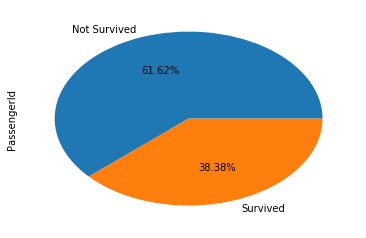

In [4]:
full_data.groupby('Survived')['PassengerId'].count().plot(kind='pie', autopct='%.2f%%', labels = ['Not Survived', 'Survived'])

## 数据整理

### 对缺失值的处理

根据提出的问题假设，在可能对生还率有影响的因素中，只有年龄有缺失值，在对年龄因素进行研究时将舍弃年龄缺失的记录。

### 筛选数据

从原数据中过滤乘客的 *Survived*、*Sex*、*Age*、*Pclass* 信息。

In [5]:
data = full_data[['Survived', 'Sex', 'Age', 'Pclass']]
data.head()

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3
3,1,female,35.0,1
4,0,male,35.0,3


## 分析数据

对问题假设的因素分别单因素和多因素分析。

### 单因素

针对单因素将采用以下分析方式：
  - 删除缺失值
  - 统计该因素下不同值（区间）乘客的生还率
  - 使用直方图显示生还率
  - 使用饼图显示不同因素下生还者所占百分比

In [6]:
# 区间分组
def cla_section_group(n, lim):
    return '[%d, %d)' % (lim * (n // lim), lim * (n // lim) + lim)

# 对值因素的分析
def analysis(element):
    # 筛选数据，并删除缺失值
    element_data = data[['Survived', element]].dropna()
    
    # 年龄需要按照区间分组
    if element == 'Age':
        # 将值转换成区间值，并生成新 DataFrame
        section_group = pd.DataFrame({
            'element_group':[cla_section_group(section, 10) for section in element_data[element]]
        })
    
        # 将区间 DataFrame 与生存数据合并
        groupby_section = pd.concat([data['Survived'], section_group], axis=1)
    
        # 按照区间分组
        groupby_element = groupby_section.groupby('element_group')
    else:
        groupby_element = element_data.groupby(element)
    
    print "生还人数："
    survived_groupby_element = groupby_element.sum()
    print survived_groupby_element
    
    print "====================="
    print "总人数："
    total_groupby_element = groupby_element.count()
    print total_groupby_element
    
    print "====================="
    print "生还率："
    survived_rate_element = survived_groupby_element / total_groupby_element
    print survived_rate_element
    
    # 直方图显示生还率
    plt = survived_rate_element.plot(kind='bar')
    plt.set_title(element + ' Survival Rate')
    plt.set_ylabel('Survival Rate')
    
    # 饼图显示不同因素生还者所占比例
    plt = survived_groupby_element.plot(kind='pie', subplots=True, autopct='%.2f%%')

#### 分析性别对生存率的影响

生还人数：
        Survived
Sex             
female       233
male         109
总人数：
        Survived
Sex             
female       314
male         577
生还率：
        Survived
Sex             
female  0.742038
male    0.188908


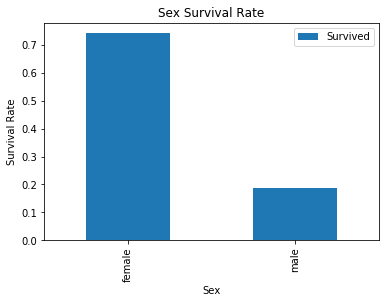

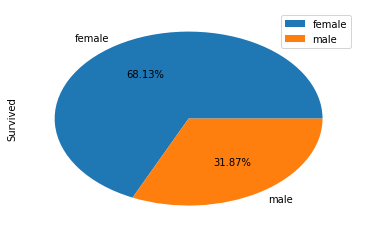

In [7]:
analysis('Sex')

通过分析发现女性的生还率远远高于男性的生还率。

按常理推测，男性的强壮性比女性高，生存几率应该较大。出现这种情况，有可能是男性协助女性逃生，或者说将生存机会让给女性。

#### 分析年龄生存率对生存率的影响

生还人数：
               Survived
element_group          
[0, 10)              19
[10, 20)             38
[20, 30)             91
[30, 40)             77
[40, 50)             30
[50, 60)             17
[60, 70)              4
[70, 80)              3
[80, 90)              0
总人数：
               Survived
element_group          
[0, 10)              62
[10, 20)            102
[20, 30)            220
[30, 40)            167
[40, 50)             89
[50, 60)             48
[60, 70)             19
[70, 80)              6
[80, 90)              1
生还率：
               Survived
element_group          
[0, 10)        0.306452
[10, 20)       0.372549
[20, 30)       0.413636
[30, 40)       0.461078
[40, 50)       0.337079
[50, 60)       0.354167
[60, 70)       0.210526
[70, 80)       0.500000
[80, 90)       0.000000


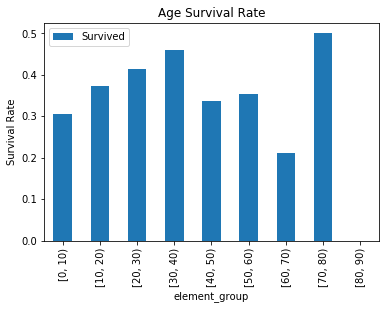

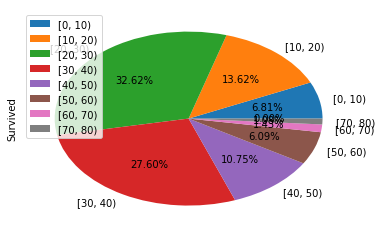

In [8]:
analysis('Age')

通过分析发现年龄在10~40岁之间的乘客不仅存活人数较多，而且生存率也较高。其中70~80分组中因为总过只有6人，总量比较少，属于特例。

可能的原因是10~40岁的人体力更好，能够坚持更长时间等待救援。

#### 分析船舱等级对生存率的影响

生还人数：
        Survived
Pclass          
1            136
2             87
3            119
总人数：
        Survived
Pclass          
1            216
2            184
3            491
生还率：
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


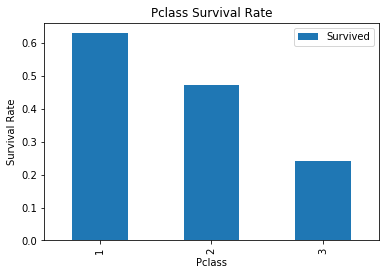

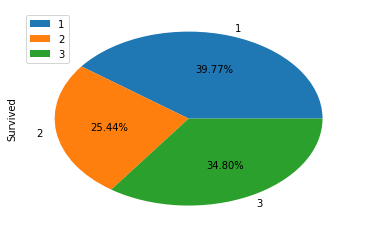

In [9]:
analysis('Pclass')

通过分析发现船舱等级越高，生存率越高。但是等级越高的船舱票价也越高，可以购买的乘客也越少，无法准确判断船舱等级是否会影响生存率。

### 双因素分析

针对双因素采取以下分析方式：
- 删除缺失值
- 统计不同因素下乘客的生还率
- 使用直方图显示生还率

In [10]:
# 对双因素分析
def double_analysis(element1, element2):
    # 筛选数据，并删除缺失值
    element_data = data[['Survived', element1, element2]].dropna()
    
    # 对因素进行分组
    if element1 == 'Age' or element2 == 'Age':
        # 年龄需要按照区间分组
        age_element = element1
        element = element2
        if element2 == 'Age':
            age_element = element2
            element = element1
        # 将值转换成区间值，并生成新 DataFrame
        section_group = pd.DataFrame({
            'element_group':[cla_section_group(section, 10) for section in element_data[age_element]]
        })
    
        # 将区间 DataFrame 与生存数据合并
        groupby_section = pd.concat([element_data['Survived'], element_data[element], section_group], axis=1)
    
        # 按照区间分组
        groupby_element = groupby_section.groupby(['element_group', element])['Survived']
    else:
        groupby_element = element_data.groupby([element1, element2])['Survived']
    
    print "生还人数："
    survived_groupby_element = groupby_element.sum()
    print survived_groupby_element
    
    print "====================="
    print "总人数："
    total_groupby_element = groupby_element.count()
    print total_groupby_element
    
    print "====================="
    print "生还率："
    survived_rate_element = survived_groupby_element / total_groupby_element
    print survived_rate_element
    
    # 直方图显示生还率
    plt = survived_rate_element.unstack().plot(kind='bar')
    plt.set_title(element1 + " + " + element2 + ' Survival Rate')
    plt.set_xlabel(element1 + " + " + element2)
    plt.set_ylabel('Survival Rate')

#### 分析船舱等级&性别对生存率的影响

生还人数：
Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64
总人数：
Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64
生还率：
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


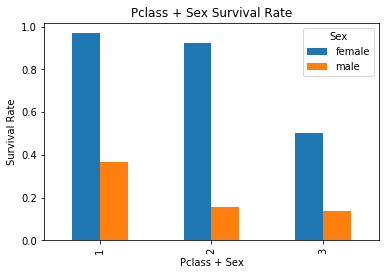

In [11]:
double_analysis('Pclass', 'Sex')

通过分析发现，不管是男性还是女性，船舱等级越高生存率越高。

#### 分析性别&年龄对生存率的影响

生还人数：
element_group  Sex   
[0, 10)        female     9.0
               male       9.0
[10, 20)       female    18.0
               male      13.0
[20, 30)       female    58.0
               male      19.0
[30, 40)       female    39.0
               male      21.0
[40, 50)       female    18.0
               male       7.0
[50, 60)       female    10.0
               male       4.0
[60, 70)       female     3.0
               male       1.0
[70, 80)       female     1.0
               male       2.0
[80, 90)       female     0.0
Name: Survived, dtype: float64
总人数：
element_group  Sex   
[0, 10)        female     16
               male       37
[10, 20)       female     24
               male       58
[20, 30)       female     71
               male      106
[30, 40)       female     50
               male       78
[40, 50)       female     25
               male       44
[50, 60)       female     14
               male       21
[60, 70)       female      6
               male       1

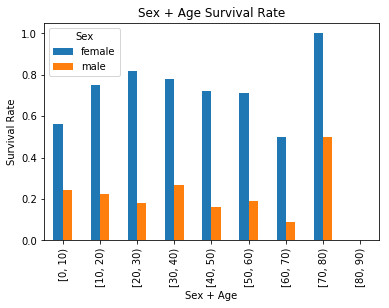

In [12]:
double_analysis('Sex', 'Age')

通过分析发现，不管什么年龄，女性的生存率均高于男性。

#### 分析船舱等级&年龄对生存率的影响

生还人数：
element_group  Pclass
[0, 10)        1.0        9.0
               2.0        5.0
               3.0        4.0
[10, 20)       1.0       11.0
               2.0        9.0
               3.0       11.0
[20, 30)       1.0       36.0
               2.0       22.0
               3.0       19.0
[30, 40)       1.0       25.0
               2.0       18.0
               3.0       17.0
[40, 50)       1.0        7.0
               2.0       10.0
               3.0        8.0
[50, 60)       1.0        4.0
               2.0        4.0
               3.0        6.0
[60, 70)       1.0        3.0
               2.0        0.0
               3.0        1.0
[70, 80)       1.0        2.0
               3.0        1.0
[80, 90)       1.0        0.0
Name: Survived, dtype: float64
总人数：
element_group  Pclass
[0, 10)        1.0       15
               2.0       10
               3.0       28
[10, 20)       1.0       24
               2.0       21
               3.0       37
[20, 30)       1.0       5

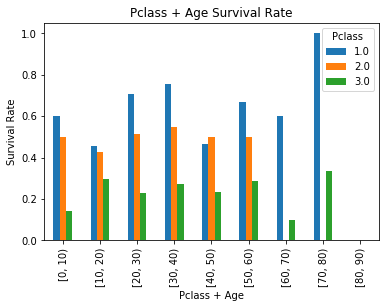

In [13]:
double_analysis('Pclass', 'Age')

通过分析发现，不管什么年龄，船舱等级越高生存率都会越高。

## 分析总结

从以上分析可以得出以下几个结论：

- 不论年龄、性别，船舱等级越高生还率越高
- 不论年龄、船舱等级，女性生还率最高

## 初步结论

  通过对泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息的分析，对于问题“有哪些因素会让船上的人生还率更高？”得出以下初步结论：

1. 舱房等级、性别、年龄是影响生还率的因素
2. 住高等级舱房的女性，其生还率是最高的

然而，由于不清楚样本是否随机选取、样本量不大，且样本数据中存在信息缺失，初步结论并无法表明这三个因素与“生还率”具有相关性。

## 参考信息来源

- [探索数据集——Titanic](https://blog.csdn.net/patrickzheng/article/details/73843594)
- [Udacity机器学习入门项目4:探索数据集](https://blog.csdn.net/zhe1110/article/details/79001012)